# Neural Network Model 생성

앞서 Softmax 알고리즘을 할때, MNIST 데이터를 예측하는 예제를 해보았다.

이제는 Neural Network Model을 이용하여 예측을 해볼 것이다.

Softmax를 이용했을때는 약 90%정도의 정확도를 기록했었는데, Neural Network를 사용했을때는 얼마나 더 좋아질 수 있을지 확인해보겠다.

또한, Initializer, Active Function 등을 조절하여 더 성능을 올려보겠다.

In [38]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기
from tensorflow.keras.layers import Dropout  # Dropout

In [19]:
# mnist 데이터 로딩 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [22]:
y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


In [39]:
model = Sequential()  # 모델 선언

# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
# he_normal은 He initializer
# glorot_normal은 Xavier normal initializer
model.add(Dense(128, activation="relu", input_shape=x_train.shape[1:], kernel_initializer='he_normal'))

#Dropout 추가하기
model.add(Dropout(0.5))

# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 손실률
print("정확도:", acc)  # 정확도

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4319 - acc: 0.8707 - val_loss: 0.1889 - val_acc: 0.9465
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2383 - acc: 0.9298 - val_loss: 0.1325 - val_acc: 0.9613
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1966 - acc: 0.9403 - val_loss: 0.1194 - val_acc: 0.9639
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1740 - acc: 0.9481 - val_loss: 0.1043 - val_acc: 0.9683
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1594 - acc: 0.9515 - val_loss: 0.1028 - val_acc: 0.9704
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1475 - acc: 0.9560 - val_loss: 0.0959 - val_acc: 0.9706
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1371 - acc: 0.9591 - val_loss: 0.0951 - val_acc: 0.9733
Epoch 8/10
1500/1500 [==============================] - 5s 3ms

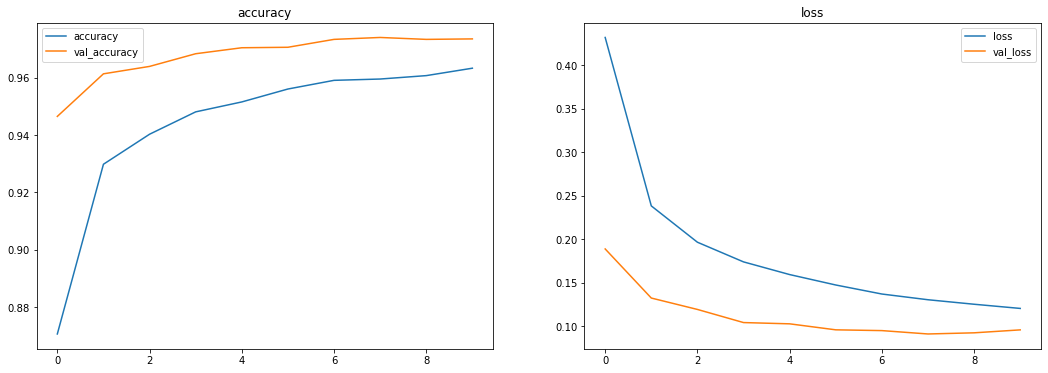

In [41]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()